 # Introduction to Probability
 *by Jonathan Frawley*


# Who am I?
 - Intro about me
 - 10 years of software development experience in industry (Python and Scala mostly)
 - Part-time PhD in Computer Science in Deep Learning
 - Research Software Engineer in Advanced Research Computing
 - Colleagues from ARC Alison Clarke and Marion Weinzierl on hand to help

# Who are ARC?
 - Technical help on projects which could benefit from computation
 - University-wide (every department, not just computationally intensive ones)
 - Provide programmers for research projects if built into grant proposals
 - Hamilton / Nice19 machine
 - Come to Research Methods Café to find out more and for ad-hoc technical advice (virtual event exists): <https://bit.ly/3eJSkNN>

# Icebreaker
 - Please say "Yes" on "Manage Participants" window 

 - Please put your hand up

 - Say briefly why you joined this course today in chat

# Basic information about today
 - Mixture of lecturing and hands on exercises. 
 - All materials are open source, including slides.
 - These will remain available after the course finishes, so don't worry if you do not get through all exercises.
 - If you notice issues, please contact me directly (jonathan.frawley@durham.ac.uk) or raise an issue on the GitHub repository: <https://bit.ly/2RZn5og>

# Outline of Day
 1. General introduction, matplotlib and basic probability theory
 2. Pandas and data analysis
 3. PyTorch and Deep Learning introduction

# Google Colab
<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*8N7xbq6ahVvWkEq_S5EhMA.jpeg" alt="Google Colab logo" width="300"/>
 
 - Google Colab is a free system for running Python notebooks in the cloud
 - It supports a wide variety of Python libraries
 - Free access to state-of-the-art GPU hardware
 - We will use Google Collab for all exercises
 - Links and instructions are included on the main page
 - Test: <https://bit.ly/2KqGiet>

# Slides are all runnable as Colab notebooks
<https://bit.ly/2VNQR0z>

# Introduction to Matplotlib

We are going to look at plotting of data using a library called [Matplotlib](https://matplotlib.org/). It is widely used, very flexible and is capable of producing publication-quality plots.

## Basic Example

We first need to import our dependencies:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Next, we generate some sample data for plotting, based on a sin wave:

In [2]:
# Data for plotting
x_data = np.arange(0.0, 2.0, 0.01)
y_data = 1 + np.sin(2 * np.pi * x_data)

Next, we setup the plots. You can setup multiple subplots but here we just setup a single plot. Then we set the labels and title of the plot. Finally, we show it:

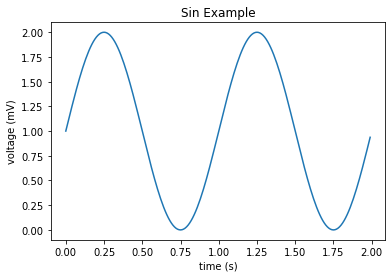

In [3]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Sin Example')
plt.show()

Let's try and change the labels, add a grid and change the colour:

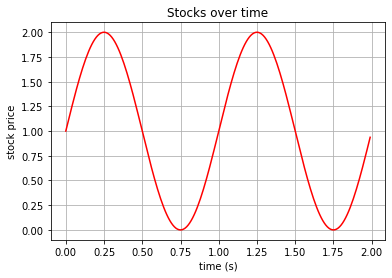

In [4]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, color='red')
ax.set(xlabel='time (s)', ylabel='stock price',
       title='Stocks over time')
ax.grid()
plt.show()

## Multiple subplots
Here we show an example of how to add multiple subplots:

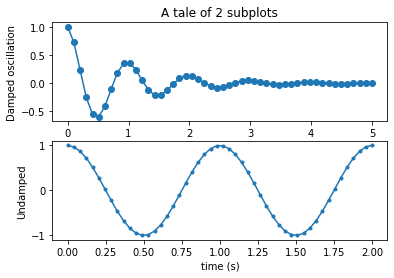

In [5]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## Histogram
Matplotlib can also be used to plot histograms of data:

In [28]:
np.random.seed(19680801)
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

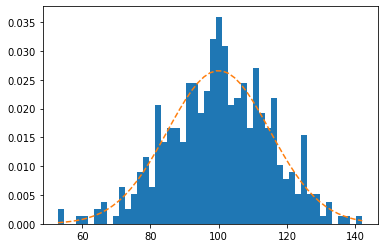

In [29]:
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
plt.show()

# Very Brief Intro to Probability Theory

How likely is an event to occur?

## Coin Flip Example

<img width=300 src="http://www.irishcoinage.com/JPEGS/K00004X4.JPG"/>


If we flip this (unbiased) coin once, how likely is it that we get heads (stag) or tails (harp)?

Intuitively, we would expect it to be heads about half the time we flip it.

In probability theory, we assign the likelihood of an event happening a number between 0 and 1.
This is known as the "probability" of the event occuring.

We can express the probability of the coin ending up on tails ($p_{tails}$) as:

$P_{tails} = 0.5$

Similarly, we can express the probability of the coin ending up on heads ($p_{heads}$) as:

$P_{heads} = 0.5$

The general formula for the probability of an independent event is :

$P_{event} = \dfrac{(total\: number\: of\: relevant\: outcomes)}{(total\: number\: of\: possible\: outcomes)}$


# Die Example🎲
Using this, can we work out probability of an unbiased die landing on 3?

$total\: number\: of\: relevant\: outcomes= 1$ (a die only has one side which has 3 on it)

$total\: number\: of\: possible\: outcomes = 6$ (a die has six sides)

$P_{three} = 1 / 6$


# Probability Distributions

## Probability Distribution Function (PDF)
This is best illustrated by an example.

Let us look at simulating the rolling of a dice 10000 times using numpy's [randint](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) function, plotting the number of results on a graph.

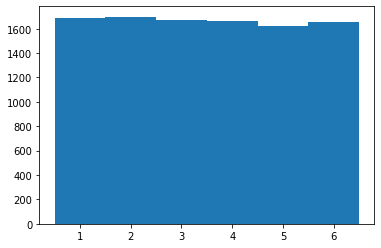

In [8]:
s = np.random.randint(1, high=7, size=10000)  # high is exclusive, so need to give 7
count, bins, ignored = plt.hist(s, bins=6, range=(0.5, 6.5))  # set range so x-axis are in middle of buckets
plt.show()

As we expected, we got a similar number of results for each of the sides. We can also plot this in such a way that the area under the graph sums to one:

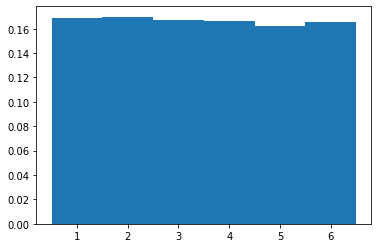

In [9]:
count, bins, ignored = plt.hist(s, bins=6, range=(0.5, 6.5), density=True)  # density=True
plt.show()

This is what is known as a Probability Density Function (PDF). The above PDF represents an example of a probability distribution known as the *uniform* distribution.

There are many kinds of probability distribution, we will talk about some important examples today.



## Normal Distribution
Probably the most important distribution is the *Normal* distribution. Also known as a bell-shaped curve or gaussian distribution.
It has many interesting rpo

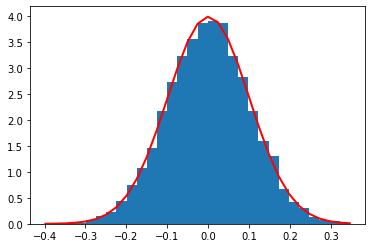

In [10]:
mean, std = 0, 0.1 # mean and standard deviation
s = np.random.normal(mean, std, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

You can see the simulated events in blue, and the ideal normal distribution in red.

## Poisson Distribution
The Poisson distribution may be useful to model events such as:
 - The number of meteorites greater than 1 meter diameter that strike Earth in a year
 - The number of patients arriving in an emergency room between 10 and 11 pm
 - The number of laser photons hitting a detector in a particular time interval

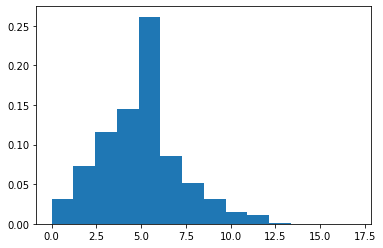

In [11]:
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

## Mean
The "average" value.

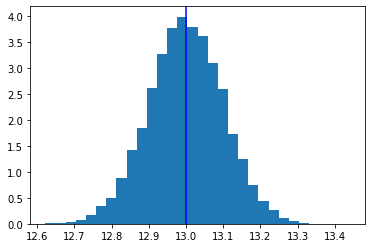

In [12]:
mean, sigma = 13, 0.1 # mean and standard deviation
s = np.random.normal(mean, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.axvline(x=mean, color='b')

plt.show()

## Standard Deviation
Basically, how spread out your data is.

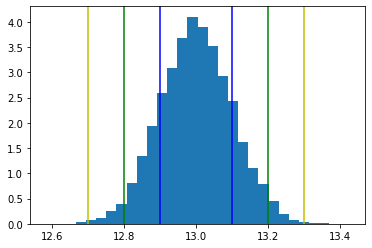

In [13]:
mean, sigma = 13, 0.1 # mean and standard deviation
s = np.random.normal(mean, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.axvline(x=mean+s.std(), color='b')
plt.axvline(x=mean-s.std(), color='b')
plt.axvline(x=mean+s.std() * 2, color='g')
plt.axvline(x=mean-s.std() * 2, color='g')
plt.axvline(x=mean+s.std() * 3, color='y')
plt.axvline(x=mean-s.std() * 3, color='y')
plt.show()

## Median

The 50th percentile of the distribution. 50% of results are below and above this point.

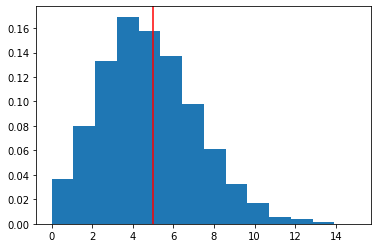

In [14]:
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)

plt.axvline(x=np.median(s), color='r')

plt.show()

## Percentile
You can also get arbitrary percentiles. This is useful in certain scenarios where you want to ensure a Quality of Service (QoS). An example might be that an online service guarantees of uptime of 99%.

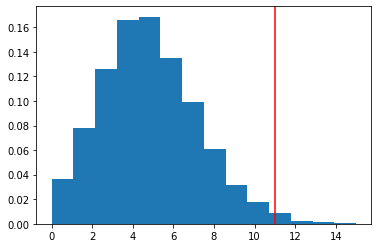

In [15]:
percentile = 99
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)

plt.axvline(x=np.percentile(s, percentile), color='r')

plt.show()

## Mode
The mode of the set of data values that appear most often

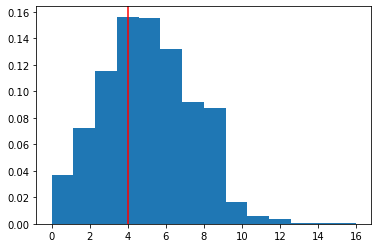

In [16]:
from scipy import stats
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)

plt.axvline(x=stats.mode(s)[0], color='r')

plt.show()

## Error Bars
You should include error bars when showing mean data from multiple samples.
This could include survey results or results of multiple runs of an experiment.
This shows how consistent or spread out your results are.

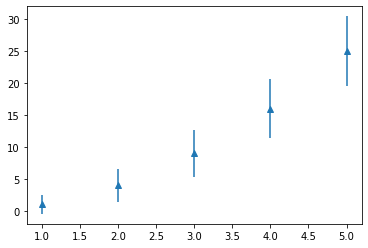

In [17]:
x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

## Further Info
 - Dice probabilities: http://www.gwydir.demon.co.uk/jo/probability/calcdice.htm

## References
 - Google Colab logo (accessed 2020-04-16): https://miro.medium.com/max/1400/1*8N7xbq6ahVvWkEq_S5EhMA.jpeg
 - Irish coin image (accessed 2020-04-16): http://www.irishcoinage.com/JPEGS/K00004X4.JPG